In [3]:
import pandas as pd

In [5]:
# Load all files
all_bls_data_information = {}
for year in range(2011, 2025):
    year_str = str(year)
    year_suffix = year_str[2:]
    all_bls_data_information[year_str] = {}
    for quarter in range(1, 5):
        quarter_str = str(quarter)
        print(f"./data/bls/allhlcn{year_suffix}{quarter_str}.xlsx")
        quarter_df = pd.read_excel(
            f"./data/bls/allhlcn{year_suffix}{quarter_str}.xlsx"
        )
        quarter_df = quarter_df[quarter_df["Industry"].str.contains("Information", na=False)]
        all_bls_data_information[year_str][quarter_str] = quarter_df
        if year_suffix == "24":
            break
all_bls_data_information

./data/bls/allhlcn111.xlsx
./data/bls/allhlcn112.xlsx
./data/bls/allhlcn113.xlsx
./data/bls/allhlcn114.xlsx
./data/bls/allhlcn121.xlsx
./data/bls/allhlcn122.xlsx
./data/bls/allhlcn123.xlsx
./data/bls/allhlcn124.xlsx
./data/bls/allhlcn131.xlsx
./data/bls/allhlcn132.xlsx
./data/bls/allhlcn133.xlsx
./data/bls/allhlcn134.xlsx
./data/bls/allhlcn141.xlsx
./data/bls/allhlcn142.xlsx
./data/bls/allhlcn143.xlsx
./data/bls/allhlcn144.xlsx
./data/bls/allhlcn151.xlsx
./data/bls/allhlcn152.xlsx
./data/bls/allhlcn153.xlsx
./data/bls/allhlcn154.xlsx
./data/bls/allhlcn161.xlsx
./data/bls/allhlcn162.xlsx
./data/bls/allhlcn163.xlsx
./data/bls/allhlcn164.xlsx
./data/bls/allhlcn171.xlsx
./data/bls/allhlcn172.xlsx
./data/bls/allhlcn173.xlsx
./data/bls/allhlcn174.xlsx
./data/bls/allhlcn181.xlsx
./data/bls/allhlcn182.xlsx
./data/bls/allhlcn183.xlsx
./data/bls/allhlcn184.xlsx
./data/bls/allhlcn191.xlsx
./data/bls/allhlcn192.xlsx
./data/bls/allhlcn193.xlsx
./data/bls/allhlcn194.xlsx
./data/bls/allhlcn201.xlsx
.

{'2011': {'1':       Area\nCode   St  Cnty  Own  NAICS  Year  Qtr Area Type  St Name  \
  11         US000   US   0.0    5   1022  2011    1    Nation      NaN   
  29         01000   01   0.0    5   1022  2011    1     State  Alabama   
  46         01001   01   1.0    5   1022  2011    1    County  Alabama   
  63         01003   01   3.0    5   1022  2011    1    County  Alabama   
  80         01005   01   5.0    5   1022  2011    1    County  Alabama   
  ...          ...  ...   ...  ...    ...   ...  ...       ...      ...   
  62179      C4942  NaN   NaN    5   1022  2011    1       MSA      NaN   
  62196      C4962  NaN   NaN    5   1022  2011    1       MSA      NaN   
  62213      C4966  NaN   NaN    5   1022  2011    1       MSA      NaN   
  62231      C4970  NaN   NaN    5   1022  2011    1       MSA      NaN   
  62249      C4974  NaN   NaN    5   1022  2011    1       MSA      NaN   
  
                                          Area  ...     Industry Status Code  \
  11

In [6]:
print(all_bls_data_information["2011"]["1"])

      Area\nCode   St  Cnty  Own  NAICS  Year  Qtr Area Type  St Name  \
11         US000   US   0.0    5   1022  2011    1    Nation      NaN   
29         01000   01   0.0    5   1022  2011    1     State  Alabama   
46         01001   01   1.0    5   1022  2011    1    County  Alabama   
63         01003   01   3.0    5   1022  2011    1    County  Alabama   
80         01005   01   5.0    5   1022  2011    1    County  Alabama   
...          ...  ...   ...  ...    ...   ...  ...       ...      ...   
62179      C4942  NaN   NaN    5   1022  2011    1       MSA      NaN   
62196      C4962  NaN   NaN    5   1022  2011    1       MSA      NaN   
62213      C4966  NaN   NaN    5   1022  2011    1       MSA      NaN   
62231      C4970  NaN   NaN    5   1022  2011    1       MSA      NaN   
62249      C4974  NaN   NaN    5   1022  2011    1       MSA      NaN   

                                        Area  ...     Industry Status Code  \
11                                U.S. TOTAL 

In [7]:
num_to_month = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}

def getCountySeries(county):
    filtered_data = []
    for year in all_bls_data_information:
        for quarter in all_bls_data_information[year]:
            quarterly_df = all_bls_data_information[year][quarter]
            quarterly_df = quarterly_df[quarterly_df["Area"] == county].copy()
            quarterly_df = quarterly_df.reset_index()

            start_mth = 3 * (int(quarter) - 1) + 1
            end_mth = start_mth + 3

            for month in range(start_mth, end_mth):
                month_str = str(month) if month > 9 else "0" + str(month)
                filtered_data.append(
                    [f"{year}-{month_str}", quarterly_df.loc[0, f"{num_to_month[month]} Employment"]]
                )

    filtered_df = pd.DataFrame(filtered_data, columns=["Year-Month", "Employment"])
    return filtered_df

In [8]:
county = "Sacramento County, California"
ex = getCountySeries(county)
ex.to_csv("./data/processed_employment/" + county.replace(" ", "_") + ".csv", index=False)

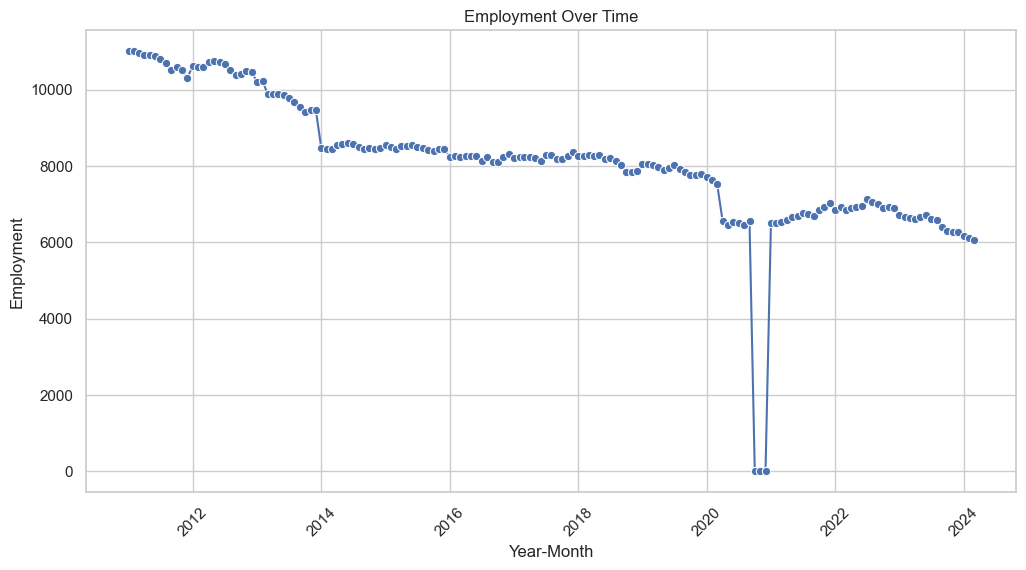

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Year-Month' to datetime format
ex["Year-Month"] = pd.to_datetime(ex["Year-Month"])

# Set the plot style
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year-Month", y="Employment", data=ex, marker="o")

# Add titles and labels
plt.title("Employment Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Employment")

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()